(chap_rois)=
# ImageJ: Measurements & histograms

In [1]:
%load_ext autoreload
%autoreload 2

# Default imports
import sys
sys.path.append('../../../')
from helpers import *
from matplotlib import pyplot as plt
from myst_nb import glue
import numpy as np
from scipy import ndimage

## Introduction

ImageJ makes generating basic measurements and histograms *extremely* easy:

* Press {kbd}`M` to make **M**easurements
  * This is the shortcut to run {menuselection}`Analyze --> Measure`.
* Press {kbd}`H` to create a **H**istogram
  * This is the shortcut to run {menuselection}`Analyze --> Histogram`.

Assuming your image is 2D and there is no ROI active (we will explore [dimensions](chap_dimensions) and [ROIs](sec_imagej_rois) later), both of these commands will use all the pixels in the image.

We'll explore how to customize the regions being measured and exactly what measurements are made later in this section, but already it should be possible to answer the following questions.

````{tab-set}

```{tab-item} Practical


*similar_1.tif*, *similar_2.tif*, *similar_3.tif* and *similar_4.tif* are all, well, similar.
However only two contain *identical* pixel values.

Which two images contain the same values?

[![launch ImageJ.JS](https://ij.imjoy.io/assets/badge/open-in-imagej-js-badge.svg)](https://ij.imjoy.io/?open=https://github.com/bioimagebook/practical-data/blob/main/images/similar_1.tif&open=https://github.com/bioimagebook/practical-data/blob/main/images/similar_2.tif&open=https://github.com/bioimagebook/practical-data/blob/main/images/similar_3.tif&open=https://github.com/bioimagebook/practical-data/blob/main/images/similar_4.tif)
```

```{tab-item} Solution

Only *similar_1.tif* and *similar_3.tif* can contain the same values.
An easy way to determine this is to compute the mean (average) of all pixels in each of the images.
Only those two images share the same mean value.

```
````

````{margin}
```{image} images/disguised.png
:width: 50%
```
````

````{tab-set}

```{tab-item} Practical


*disguise_matching.tif* has lost its match.

Which of the following three images have the same pixel values as *disguise_matching.tif*?
* *disguised_1.tif*
* *disguised_2.tif*
* *disguised_3.tif*

[![launch ImageJ.JS](https://ij.imjoy.io/assets/badge/open-in-imagej-js-badge.svg)](https://ij.imjoy.io/?open=https://github.com/bioimagebook/practical-data/blob/main/images/disguise_matching.tif&open=https://github.com/bioimagebook/practical-data/blob/main/images/disguised_1.tif&open=https://github.com/bioimagebook/practical-data/blob/main/images/disguised_2.tif&open=https://github.com/bioimagebook/practical-data/blob/main/images/disguised_3.tif)
```

```{tab-item} Solution

*disguised_3.tif* is the matching image.

```

````

## Measuring images

When using {menuselection}`Analyze --> Measure`, the measurements are added to a *Results table*.

By default, the mean, minimum and maximum pixel values are provided, along with the area of the image... and that's all.
It's not a lot.

Furthermore, if you make multiple measurements then they are added to the *same* results table, without any identifiers.
This is especially confusing if you have several images open at the same time, and have no clue which row of the results table corresponds to measurements from which image.

{menuselection}`Analyze --> Set Measurements...` makes it possible to address both of these limitations.
It not only provides many more measurements that can be selected, it includes a crucial {guilabel}`Display label` option that will cause the title of the image to be included in the results table ({numref}`fig-measure`).


(sec_imagej_measure_calibration)=
:::{admonition} Measurement units matter -- but aren't displayed!
:class: caution

The results table does not include units for measurements, even though these are essential.
Seeing an area of 10 *might* mean 10 pixels<sup>2</sup>, or 10 µm<sup>2</sup>... or something else entirely.

See {ref}`chap_pixel_size` for more information about why that matters for any measurements of size (area, length etc.), and how to check the units.
:::

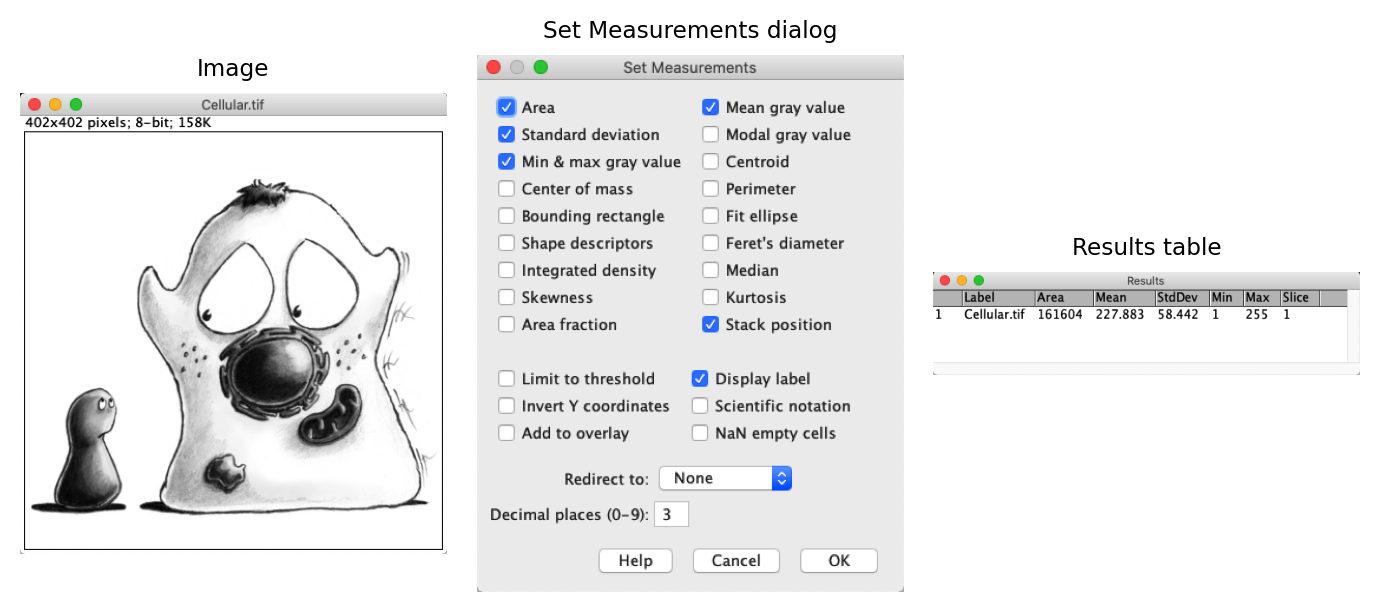

In [2]:
fig = create_figure(figsize=(7, 4))
plt.subplot(1, 3, 1)
show_image('images/measure-image.png', title='Image')
plt.subplot(1, 3, 2)
show_image('images/measure-set.png', title='Set Measurements dialog')
plt.subplot(1, 3, 3)
show_image('images/measure-results.png', title='Results table')
plt.tight_layout()
glue_fig('fig_measure_results', fig)

```{glue:figure} fig_measure_results
---
align: center
name: fig-measure
figwidth: 100%
---
Measurements made on an image are added to a results table. The choice of measurements to make can be changed using the {menuselection}`Analyze --> Set Measurements...` command.
```

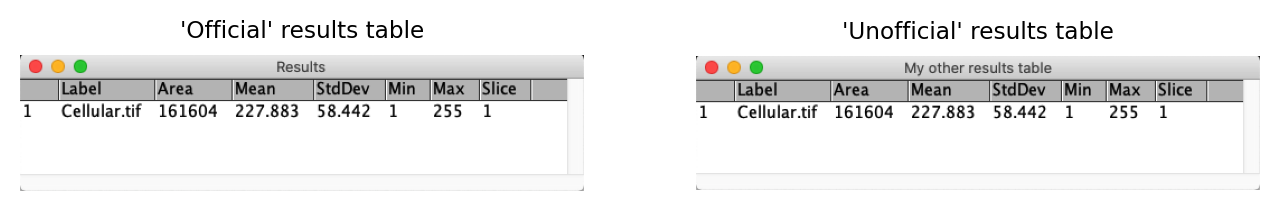

In [3]:
fig = create_figure(figsize=(8, 4))
show_image('images/measure-results.png', title="'Official' results table", pos=121)
show_image('images/measure-unofficial.png', title="'Unofficial' results table", pos=122)
glue_fig('fig_measure_tables', fig)

````{admonition} The 'One True Results Table' & its imposters

A small idiosyncrasy to be aware of is that, as far as ImageJ is concerned, there is only ever one 'official' results table -- the one with the title {guilabel}`Results`.

Different, similar-looking tables can be created by different commands, or by duplicating an existing results table with {menuselection}`File --> Duplicate...`.
Nevertheless, any new measurements you make with the {menuselection}`Measure` command will *only* be added to the original, official table.
This also has an extra {guilabel}`Results` entry in its menu bar that other tables lack.

```{glue:figure} fig_measure_tables
```

````

### Choosing which measurements to select

Some options within {menuselection}`Analyze --> Set Measurements...` are so universally useful that they should pretty much always be set.
Conversely, some options are manifestly confusing and dangerous and should be used rarely -- or not at all.

Options to **always** select:
* {guilabel}`Area`, {guilabel}`Mean gray value`, {guilabel}`Standard deviation`, {guilabel}`Min & max gray value` -- basic summary values
* {guilabel}`Display label` -- includes the image title
* {guilabel}`Stack Position` -- includes the 2D plane that has been measured in an image with {ref}`more dimensions <chap_dimensions>`.

Options to **avoid**:
* {guilabel}`Limit to threshold` -- restricts the region being measured according to any {ref}`threshold <chap_thresholding>` that has been set; don't do this routinely, instead convert your threshold to a ROI and use that instead.
* {guilabel}`Redirect to` -- measures a different image from the one that's selected. It sounds weird, but it's intended for cases where you have two corresponding images; one in which you can identify a region to measure, and one that contains the pixel values you should measure.

The two options that I think you should avoid can both result in something unexpected being measured if you don't know (or have forgotten) that either was selected under {menuselection}`Analyze --> Set Measurements...`.

Fortunately, they are not really needed if you master the art of generating, managing and transferring regions of interest between images.


(sec_imagej_rois)=
## Regions Of Interest

**Regions Of Interest (ROIs)** can be used to define specific parts of an image that should be processed independently or measured.
Only pixels within any ROI we draw will be included in the calculations when we run {menuselection}`Analyze --> Measure`.

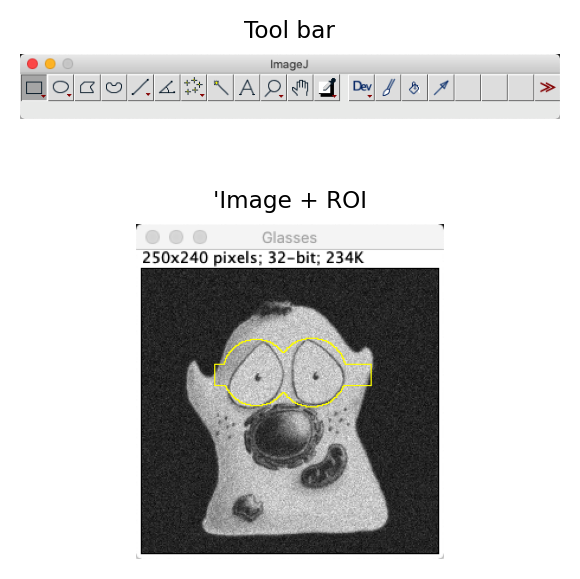

In [4]:
fig = create_figure(figsize=(3, 3.5))
show_image('images/roi-toolbar.png', title="Tool bar", pos=211)
show_image('images/roi-glasses.png', title="'Image + ROI", pos=212)
plt.tight_layout()
glue_fig('fig_rois_drawing', fig)

```{glue:figure} fig_rois_drawing
---
align: center
name: fig-roi_drawing
figwidth: 60%
---
ROI drawing tools are found on the left side of the ImageJ tool bar (A). The ROI in (B) was created by drawing one rectangular and two circular ROIs, holding down the {kbd}`Shift` key between each so that the regions were combined.
```

ROIs of different types (e.g. rectangles, circles, lines, points, polygons, freehand shapes) can be drawn using the commands in the tool bar ({numref}`fig-roi_drawing`), and are invariably 2D.
Right-clicking the tools often provides access to related tools, while double-clicking may give additional options.
When drawing a ROI, pressing {kbd}`Shift` or {kbd}`Control` before releasing the mouse button adds the ROI being drawn to any existing ROI already present.

:::{margin}
**ROIs** in ImageJ are sometimes called **selections** -- meaning the same thing
:::

Somewhat confusingly, ROIs are sometimes referred to as **selections** in ImageJ.
This is why some extra commands to create or adjust ROIs appear under the {menuselection}`Edit --> Selection` submenu.

One such command is {menuselection}`Edit --> Selection --> Create Mask`.
This creates a new [binary](chap_binary) (black and white) image that differentiates between the pixels that are inside and outside the ROI.

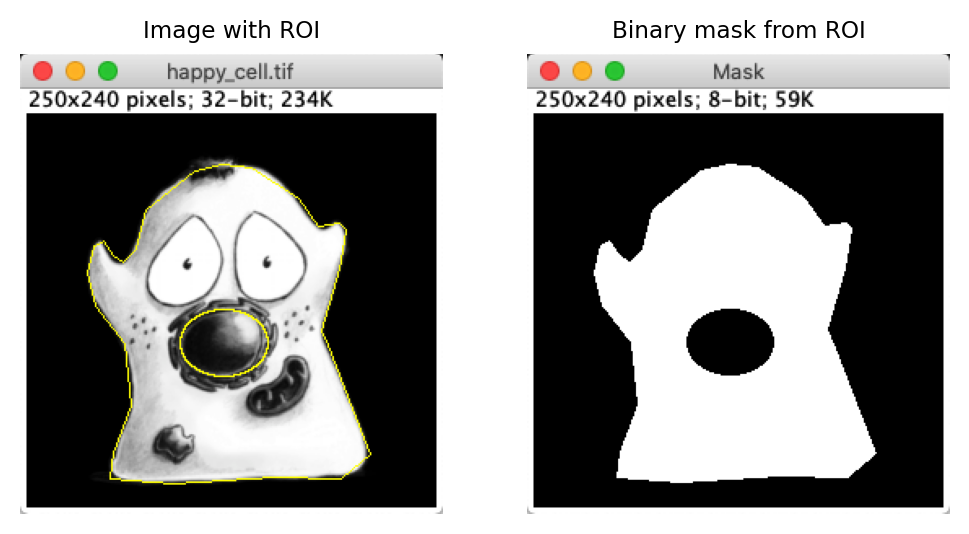

In [5]:
fig = create_figure(figsize=(6, 4))
show_image('images/binary-happy-cell.png', title="Image with ROI", pos=121)
show_image('images/binary-happy-mask.png', title="Binary mask from ROI", pos=122)
#plt.tight_layout()
glue_fig('fig_rois_mask', fig)

```{glue:figure} fig_rois_mask
---
align: center
name: fig-rois_mask
figwidth: 70%
---
A ROI representing an area is usually depicted using yellow lines drawn on an image, but sometimes it isn't clear which pixels are inside or outside the ROI. {menuselection}`Edit --> Selection --> Create Mask` can help clarify this.
```

```{figure} images/binary-options.png
---
scale: 70%
figclass: margin
---
{menuselection}`Process --> Binary --> Options...`
```

:::{admonition} Interpreting 'Create Mask'
:class: danger

Unfortunately, when using {menuselection}`Edit --> Selection --> Create Mask` it is not *entirely certain* whether black means 'inside' or 'outside'.
This depends upon whether {guilabel}`Black background` is selected within {menuselection}`Process --> Binary --> Options...`.

This doesn't usually matter in practice, because it tends to be clear from the context; ROIs usually cover a small region of the image, so the background color is the one seen in the majority of pixels.

An exception to this is if {menuselection}`Edit --> Selection --> Make Inverse` has been used to flip a ROI to represent all the background pixels of the original, with the foreground removed.
:::

:::{admonition} Don't overestimate the accuracy of measurements
:class: caution

Although ImageJ can measure very exactly whatever regions it is told to measure _within an image_, keep in mind that in light microscopy images any size measurements will not exactly correspond to sizes of structures _in real life_.
This is especially true at very small scales (hundreds of nanometers or smaller), for resolution-related reasons that will be described in {ref}`chap_formation_spatial`.
:::

## Working with multiple ROIs

Normally, only a single ROI can be 'active' in ImageJ (i.e. affecting measurements) at any one time.
If you need control over multiple ROIs, there are two places in which you can store them.
These differ according to purpose:

1.  **The ROI Manager:** for most ROIs that you want to be able to edit and use for measurements
2.  **The image overlay:** for ROIs that you only want to display

### The ROI Manager

```{margin}
{kbd}`T` for _**T**roy manager_: shortcut to add ROI to the ROI Manager
```

ImageJ's *ROI Manager* provides a convenient way to store multiple ROIs in a list, allowing you to easily access, edit and measure them.

The slow way to open the ROI Manager is to choose {menuselection}`Analyze --> Tools --> ROI Manager...`.
The fast way is just to draw a ROI and press {kbd}`T`.

The additional {guilabel}`Measure` command within the manager is then like applying {menuselection}`Analyze --> Measure` to each ROI in turn.
If you happen to want to show all the ROIs simultaneously, you can select the {guilabel}`Show All` option [^fn_1].

[^fn_1]: If you have a stack, you also may need to explore {guilabel}`More >> Options...` to define whether all ROIs are shown on all slices, or only on the slices on which they were first created.

Because ROIs in the ROI Manager are represented independently of the image on which they were defined, you can create a ROI on one image, add it to the ROI manager, select a different image and then click on the ROI in the ROI Manager to place it on the second image.
This provides one way to transfer a ROI from one image to another.

Measurements made from the ROI Manager always use the most recently-selected image, so be careful if you have several images open at the same time.
This is another reason why choosing {guilabel}`Display label` under {menuselection}`Analyze --> Set Measurements...` is so important.

:::{admonition} Transferring individual ROIs
:class: tip

A faster way to transfer a single ROI between images without using the ROI Manager is to click on the second image and press {kbd}`Shift+E` (the shortcut for {menuselection}`Edit --> Selection --> Restore Selection`)
:::

:::{admonition} Expert ROI manipulation with the ROI Manager
:class: tip

Using the ROI Manager, you can craft your ROIs into more complex shapes: adding or removing other ROIs.

To do this, first add the main ROIs you want to work with to the manager. Then select them, and choose from among the options:

* {guilabel}`AND` – create a ROI containing only the regions where the selected ROIs overlap
* {guilabel}`OR` – create a single ROI composed by combining all the selected ROIs
* {guilabel}`XOR` – create a single ROI containing all the selected ROIs, _except_ the places where they overlap ('eXclusive OR')
:::

```{figure} images/binary-happy-roi-manager.png
---
scale: 70%
figclass: margin
---
The *ROI Manager* with two ROIs
```

````{tab-set}

```{tab-item} Practical


For {numref}`fig-rois_mask`, I used the ROI Manager to create a ROI with a hole in it.

To do this in *happy_cell.tif*, you can

   1. Draw one ROI around the full cell, and add it to the ROI Manager
   2. Draw a second ROI around the nucleus, and add it to the ROI Manager

Then you can select both ROIs and use *one* of the combine operations -- {guilabel}`AND`, {guilabel}`OR`, {guilabel}`XOR` -- to subtract the nucleus ROI from the cell ROI.
The end result is a ROI representing the cytoplasm, with the nucleus removed.

Which combine operation do you need to achieve this?

**Tip:** Remember {menuselection}`Edit --> Selection --> Create Mask` will let you see which pixels are inside and which pixels are outside the ROI.


[![launch ImageJ.JS](https://ij.imjoy.io/assets/badge/launch-imagej-js-badge.svg)](https://ij.imjoy.io/?open=https://github.com/bioimagebook/practical-data/blob/main/images/happy_cell.tif)
```

```{tab-item} Solution

{guilabel}`XOR` ('exclusive OR') provides a ROI that contains pixels that are inside the cell OR inside the nucleus, but NOT both.

```

````

(sec_imagej_overlay)=
### Overlays

```{margin}
{kbd}`B` for _**B**overlay_: shortcut to add a ROI to an overlay
```

Overlays also contain a list of ROIs that are shown simultaneously on the image.
However, unlike with the ROI Manager, ROIs stored on an overlay do _not_ usually affect the {guilabel}`Measure` command.

Overlays are therefore suitable for storing annotations for visualization purposes.
You can think of them as existing on their own separate layer, so that adding and removing the overlay does not mess up the underlying pixel values ({numref}`fig-rois`).

The main commands for working with overlays are found in the {menuselection}`Image --> Overlay -->` submenu, where you can get started by drawing a ROI and choosing {guilabel}`Add Selection` (or simply press {kbd}`B`).
The same submenu also provides commands to transfer ROIs between the overlay and the ROI Manager.

:::{tip}
You can 'reactivate' a ROI on an overlay by clicking it with the {kbd}`Alt` key pressed (provided a suitable ROI tool is selected), and then edit or reposition it.

Note that if a ROI on an overlay has been 'reactivated' in this way, then it *does* influence measurements.
:::

### Saving ROIs

Individual ROIs, currently active on an image, can be saved simply by choosing {menuselection}`File --> Save As --> Selection...`

The ROI Manager also has a {guilabel}`Save...` command (under {guilabel}`More`), which will save whichever ROIs are currently selected in the manager (or, if none are selected, all of them).

Overlays are fixed to specific images and do not have their own special save command, but will nonetheless be included if you save the image as a TIFF file (ImageJ's default format).
Any currently-active ROI will also be saved in a TIFF.

This is all fine if you work only in ImageJ or Fiji, but unfortunately if you try to view your ROIs in other software it is highly unlikely to work properly.
The ROI format is specific to ImageJ.

The way around this is to use the {menuselection}`Image --> Overlay --> Flatten` command.
This creates an _RGB copy of the image in which the pixel values have been changed_ so that any ROIs or overlays will appear whenever you open the image elsewhere.
Therefore you may well want to use this command when creating figures or presentations, but you do _not_ want to subsequently apply your analysis to the image you have flattened – always use the original instead.

For more details on the impact of converting an image to RGB, see {ref}`chap_colors`.

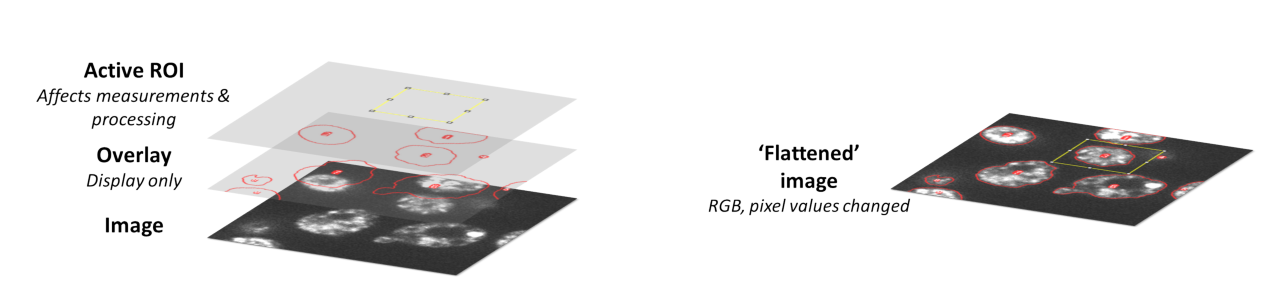

In [6]:
fig = create_figure(figsize=(8, 4))
show_image('images/rois_and_overlays.png', pos=121)
show_image('images/rois_flattened.png', pos=122)
glue_fig('fig_rois_flatten', fig)

```{glue:figure} fig_rois_flatten
---
align: center
name: fig-rois
---
ROIs and overlays are displayed on top of images, and so can be removed easily without having any effect upon the pixel values.
Flattened images may appear the same on screen, but are invariably RGB (see {ref}`chap_colors`) and have had their pixel values permanently changed to show any annotations.
```


````{margin}
```{image} images/annotated_cyclists.png
````

````{tab-set}

```{tab-item} Practical


Open the images *Annotated_Cyclists_1.tif* and *Annotated_Cyclists_2.tif*, which depict the 3 main cyclist characteristics I found most disconcerting as a pedestrian in Heidelberg.

The images should initially look the same, but in one the text is an overlay, while in the other the image has been flattened.
Which is which? Try to think of several ways to investigate this.

**Tip:** Zooming in may help. So might searching the menus for overlay-related commands (aided by {kbd}`L`).

[![launch ImageJ.JS](https://ij.imjoy.io/assets/badge/open-in-imagej-js-badge.svg)](https://ij.imjoy.io/?open=https://github.com/bioimagebook/practical-data/blob/main/images/Annotated_Cyclists_1.tif&open=https://github.com/bioimagebook/practical-data/blob/main/images/Annotated_Cyclists_2.tif)
```

```{tab-item} Solution
*Annotated_Cyclists_1.tif* is the one with the overlay.

Five ways to determine whether an annotation is an overlay or not:

1.  Zoom in very closely to the region containing the annotation. If it becomes 'blocky', i.e.
made up of pixels, it is not an overlay.
If it remains smooth, then it is an overlay.
2.  Move your cursor over the region where the annotation appears, and look at the pixel values.
If the values are all the same where the annotation is present, but different elsewhere, then it is unlikely to be an overlay: the annotation is influencing the pixel values.
3.  Using the paintbrush <img src="../../../images/imagej/icons/brush.png" /> tool from the toolbar, try putting some other color where the annotation appears.
If the annotation remains visible on top of where you drew, it must be on an overlay.
4.  Choose {menuselection}`Image --> Overlay --> Hide Overlay` and see if the annotation disappears.
5.  Choose {menuselection}`Image --> Overlay --> To ROI Manager` and see if anything happens at all.
```

````

````{tab-set}

```{tab-item} Practical


Using the cyclist image containing the overlay from the previous practical, rearrange the annotations so that they are each positioned next to different cyclists.

You could do this by deleting the overlay and starting again, but there are other, faster possibilities (using a technique mentioned before, or the {menuselection}`Image --> Overlay --> To ROI Manager` command).

[![launch ImageJ.JS](https://ij.imjoy.io/assets/badge/open-in-imagej-js-badge.svg)](https://ij.imjoy.io/?open=https://github.com/bioimagebook/practical-data/blob/main/images/Annotated_Cyclists_1.tif&open=https://github.com/bioimagebook/practical-data/blob/main/images/Annotated_Cyclists_2.tif)
```


```{tab-item} Solution

Click the annotation while holding down the {kbd}`Alt` key, to bring it to life so it can be moved around again.
This only works if certain tools are selected, e.g. {guilabel}`Rectangle` or {guilabel}`Text`, because some other tools have more overriding functions, such as zooming in or scrolling.
```

````

## Generating histograms

Creating a histogram in ImageJ, via {menuselection}`Analyze --> Histogram` or simply pressing {kbd}`H`, results in a new histogram window being created.
Like with {menuselection}`Analyze --> Measure`, this will use a ROI if it is available; otherwise it will use the full image.

An ImageJ histogram is displayed above some basic summary statistics and four intriguing buttons:

* {guilabel}`List` -- to list the actual bins and counts associated with the histogram
* {guilabel}`Copy` -- to copy the list above to the clipboard
* {guilabel}`Log` -- to change the y axis to show the log of the counts for each bin; this is helpful to distinguish between counts that are very small
* {guilabel}`Live` -- to make the histogram responsive to whatever you do with the image -- including changing the LUT, or any ROI

```{figure} images/measure-imagej-histogram.png
---
scale: 70%
align: center
class: dark-light
---
An image with its histogram in ImageJ.
```

:::{admonition} A histogram of an image... and an image of a histogram

A slightly odd feature of ImageJ histograms is that *the histogram is also an image*.
That means you can draw ROIs and even make measurements on it.
We will revisit this in {ref}`chap_pixel_size`.
:::